<a href='https://www.hexnbit.com/'> <img src='https://www.hexnbit.com/wp-content/uploads/2019/09/hexnbit_final_66px.png'/> </a>

All cells must be suitably commented / documented.

### Import modules

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

### Read Dataset

In [2]:
name = ['Buying', 'Maintain', 'Doors', 'Persons', 'luggage_area', 'Safety', 'Accounts']
df = pd.read_csv('car.data',names=name)
df.head()

,Buying,Maintain,Doors,Persons,luggage_area,Safety,Accounts
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Preprocessing

### 1.Check for Missing Data

In [3]:
df.describe()

,Buying,Maintain,Doors,Persons,luggage_area,Safety,Accounts
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,low,low,5more,more,big,low,unacc
freq,432,432,432,576,576,576,1210


As we can see there is no missing value.Because count is equal to 1728 for all feature/column 

### 2.Convert columns datatype

In [4]:
def change_value(column, values):
    
    '''Take column value and change value into desired value'''
    
    if (column == values):
        column = 5
    return column

df['Doors'] = df['Doors'].apply(lambda x : change_value(x,'5more'))
df['Persons'] = df['Persons'].apply(lambda x : change_value(x,'more'))
df['Doors'] = df['Doors'].astype('int')
df['Persons'] = df['Persons'].astype('int')
df

,Buying,Maintain,Doors,Persons,luggage_area,Safety,Accounts
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5,5,med,med,good
1724,low,low,5,5,med,high,vgood
1725,low,low,5,5,big,low,unacc
1726,low,low,5,5,big,med,good


For simplicity we change the value of 5more and more into 5. Which means it could be 5 or more.

### Handle Categorical Values

In [5]:
# col = ['Buying', 'Maintain', 'luggage_area', 'Safety']
# df = pd.get_dummies(df, columns = col, drop_first = True)
df['Accounts'] = df['Accounts'].replace({'unacc':1,'acc':2,'good':3,'vgood':4})
df['Buying'] = df['Buying'].replace({'vhigh':1,'high':2,'med':3,'low':4})
df['Maintain'] = df['Maintain'].replace({'vhigh':1,'high':2,'med':3,'low':4})
df['luggage_area'] = df['luggage_area'].replace({'small':1,'med':2,'big':3})
df['Safety'] = df['Safety'].replace({'low':1,'med':2,'high':3})

We converted categorical values into numeric value.

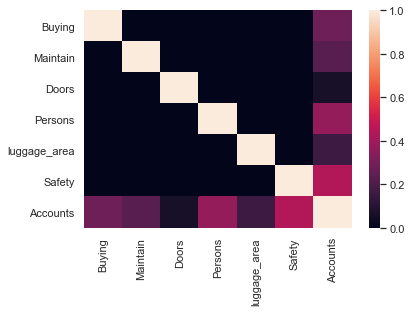

In [35]:
x = df.drop(['Accounts'],axis=1).copy()
y = df['Accounts']
sns.heatmap(df.corr())

### Split Data for Training and Testing

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### Apply different Classification Algorithms and tune them

In [37]:
pipe_lr = Pipeline([
    ('clf', LinearRegression())
])
pipe_rf = Pipeline([
    ('clf', RandomForestClassifier(random_state=9))
])
pipe_svm = Pipeline([
    ('clf', SVC(random_state=9))
]) 
pipe_dt = Pipeline([
    ('clf', DecisionTreeClassifier(random_state=9))
]) 


### Get performance metrics for all the applied classifiers

In [43]:
param_range = [5, 7, 9, 10, 12, 15]
jobs = -1

grid_params_dt = [{'clf__criterion': ['entropy', 'gini'], 
        'clf__max_depth': param_range}]

grid_params_rf = [{'clf__criterion': ['entropy', 'gini'],
        'clf__max_depth': param_range,
        'clf__min_samples_split': param_range[1:]}]

grid_params_svm = [{'clf__kernel': ['rbf'], 
        'clf__C': param_range}]

In [44]:
gs_lr = pipe_lr

gs_dt = GridSearchCV(estimator=pipe_dt,
            param_grid=grid_params_dt,
            scoring='accuracy',
            cv=10, 
            n_jobs=jobs)

gs_rf = GridSearchCV(estimator=pipe_rf,
            param_grid=grid_params_rf,
            scoring='accuracy',
            cv=10, 
            n_jobs=jobs)

gs_svm = GridSearchCV(estimator=pipe_svm,
            param_grid=grid_params_svm,
            scoring='accuracy',
            cv=10,
            n_jobs=jobs)

In [45]:
grids = [ gs_dt, gs_rf, gs_svm]
grid_dict = {0:'Decision Tree', 1: 'Random Forest', 2: 'Support Vector Machine'}
print('Performing model optimizations...')
cm_list = []
best_acc = 0.0
best_clf = 0
best_gs = ''

for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    # Fit grid search
    gs.fit(X_train, y_train)
    # Best params
    print('Best params: %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training accuracy: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred = gs.predict(X_test)
    cm_list.append(confusion_matrix(y_test, y_pred))
    # Test data accuracy of model with best params
    print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))
    # Track best (highest test accuracy) model
    if accuracy_score(y_test, y_pred) > best_acc:
        best_acc = accuracy_score(y_test, y_pred)
        best_gs = gs
        best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])

Performing model optimizations...

Estimator: Decision Tree
Best params: {'clf__criterion': 'entropy', 'clf__max_depth': 10}
Best training accuracy: 0.983
Test set accuracy score for best params: 0.973 

Estimator: Random Forest
Best params: {'clf__criterion': 'entropy', 'clf__max_depth': 12, 'clf__min_samples_split': 7}
Best training accuracy: 0.968
Test set accuracy score for best params: 0.960 

Estimator: Support Vector Machine
Best params: {'clf__C': 15, 'clf__kernel': 'rbf'}
Best training accuracy: 0.983
Test set accuracy score for best params: 0.965 

Classifier with best test set accuracy: Decision Tree


In [49]:
model = LinearRegression()
model.fit(X_train, y_train)
predict=model.predict(X_test)
accuracy_score(y_test,np.round(predict).astype('int'))

0.7013487475915221

### Visually compare the performance of all classifiers

[Text(0.5, 1.0, 'Decision Tree')]

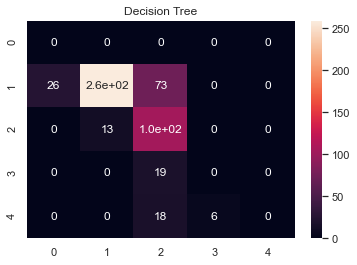

In [50]:
sns.heatmap(confusion_matrix(y_test,np.round(predict).astype('int')), annot=True).set(title='Decision Tree')

### Linear regression has Test accuracy score of  = 70.0%

[Text(0.5, 1.0, 'Decision Tree')]

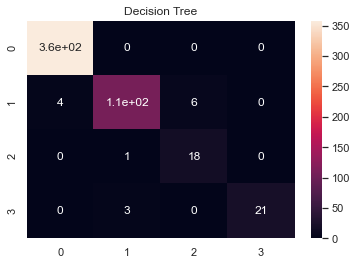

In [46]:
sns.heatmap(cm_list[0], annot=True).set(title='Decision Tree')

### Decision Tree has Test accuracy score of  = 97.3%

[Text(0.5, 1.0, 'Random Forest Tree')]

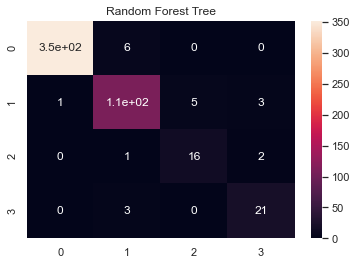

In [47]:
sns.heatmap(cm_list[1], annot=True).set(title='Random Forest Tree')

### Random Forest Tree has Test accuracy score of  = 96.0%

[Text(0.5, 1.0, 'Support Vector Machine')]

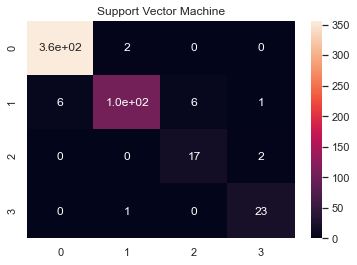

In [48]:
sns.heatmap(cm_list[2], annot=True).set(title='Support Vector Machine')

### Support Vector Machine has Test accuracy score of  = 96.5%

## Document about Random forest

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

A random forest is an ensemble of a certain number of random trees, specified by the number of trees parameter. Each node of a tree represents a splitting rule for one specific Attribute. Only a sub-set of Attributes, specified with the subset ratio criterion, is considered for the splitting rule selection. This rule separates values in an optimal way for the selected parameter criterion. The building of new nodes is repeated until the stopping criteria are met.

After generation, the random forest model can be applied to new Examples using the Apply Model Operator. Each random tree generates a prediction. Class predictions are based on the majority of Examples, while estimations are obtained through the average of values reaching a leaf. The resulting model is a voting model of all created random trees. Since all single predictions are considered equally important, and are based on sub-sets of Examples the resulting prediction tends to vary less than the single predictions.

A concept called pruning can be leveraged to reduce complexity of the model by replacing sub-trees, that only provide little predictive power with leaves. For different types of pruning refer to the parameter descriptions.

#### We could further increase the accuracy of using Deep Learning.